In [1]:
import dataset as ds
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
import rasterio
import rasterio.plot
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
csv_pth = './hennepin_bbox.csv'
shp_pth = './hennepin_county_parcels/hennepin_county_parcels.shp'
root_dir = './image_set/'

dataset = ds.HennepinDataset(csv_pth, shp_pth, root_dir)
print( len(dataset))


1320


In [3]:
fig,axs = plt.subplots(2, 2, figsize = (10,10))
axs = axs.flatten()
for i in range(0,4):
    x = np.random.randint(len(dataset))
    gdf = dataset[x]['geometry']
    gdf.plot(column = 'TOTAL_MV1', ax = axs[i], alpha = 0.6, linewidth=3)
    axs[i].imshow(dataset[x]['image'], extent = dataset[x]['img_bbox'], origin = 'upper')
fig.savefig('image.jpg')

IndexError: list index out of range

In [4]:
poly_array = dataset[14]['geometry']
image = dataset[14]['image']
mv_array = dataset[14]['value']
img_bbox = dataset[14]['img_bbox']

(4982154.0, 4982758.0)


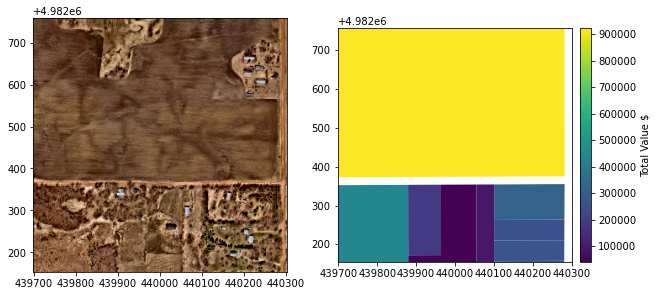

In [5]:
fig,axs = plt.subplots(1, 2, figsize = (10,8))
axs[0].imshow(image, extent = img_bbox, origin = 'upper')
axs[1].set_xlim( img_bbox[0:2] )
axs[1].set_ylim( img_bbox[2:4] )

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
poly_array.plot(column = 'TOTAL_MV1', ax = axs[1], alpha = 1, linewidth=3, legend = True, legend_kwds={'label': "Total Value $", 'orientation': "vertical"}, cax =cax)


print(img_bbox[2:4])

In [6]:
fig.savefig('image.jpg')